In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pymongo import MongoClient
client = MongoClient('localhost')
db = client['crowdy']

In [2]:
db.collection_names()
hits = db.hits
ts = db.tasksets

## Task completion times

Let's compare basic stats for completion times between different conditions.

In [9]:
time_search = ts.aggregate([
    {'$match':{'meta.test':False, 'meta.type':'image tagging'}},
    {'$unwind':'$tasks'},
    {'$project':{
                'timeSpent':'$tasks.timeSpent',
                'design': '$meta.design', 
                'condition': '$meta.condition'
            }},
])
times = pd.DataFrame(list(time_search))
times

,_id,condition,design,timeSpent
0,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,fast,fast,10.769
1,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,fast,fast,22.134
2,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,fast,fast,16.018
3,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,fast,fast,15.310
4,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,fast,fast,17.797
5,30BUDKLTXDVIOCN036YEKN7QZPW5EN,fast,fast,7.660
6,30BUDKLTXDVIOCN036YEKN7QZPW5EN,fast,fast,13.400
7,30BUDKLTXDVIOCN036YEKN7QZPW5EN,fast,fast,12.432
8,30BUDKLTXDVIOCN036YEKN7QZPW5EN,fast,fast,10.429
9,30BUDKLTXDVIOCN036YEKN7QZPW5EN,fast,fast,3.470


Due to varying sample sizes (i.e. the difficult in getting the Feedback condition N to match), Kernel Density is used.

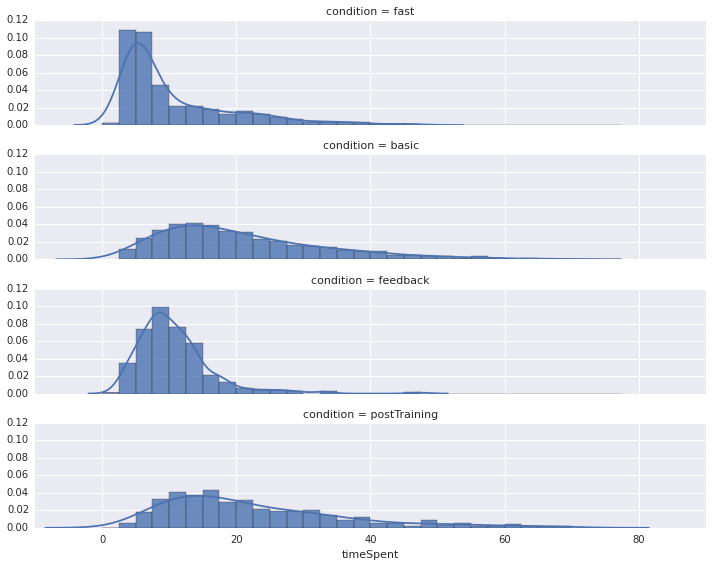

In [17]:
g = sns.FacetGrid(times.query('timeSpent < 70'), row='condition', size=2, aspect=5, margin_titles=False)
g.map(sns.distplot, "timeSpent", 
      kde=True, rug=False, 
      hist_kws={'alpha':0.8}, 
      # bins are 0 to 80 in 2.5 increments
      bins=np.arange(0, 80, 2.5)) \
    .savefig("../images/tagTime1.png")

The raw stats

In [15]:
groups = times[['timeSpent', 'condition']].groupby('condition')
groups.agg([np.mean, 
            np.median, 
            np.std,
            len
           ])

timeSpent                         
                   mean   median        std  len
condition                                       
basic         22.889145  18.3540  17.652472  846
fast          11.459299   6.9390  11.461534  500
feedback      10.752292   9.7750   5.658974  264
postTraining  25.026853  19.8455  19.875191  490

To drive home the differences, let's perform statistical tests. The Mann-Whitney U is appropriate here.

In [13]:
conditions =  times['condition'].unique()
conditions
for x in conditions:
    xtimes = times[times['condition'] == x]['timeSpent']
    for y in conditions:
        if x == y:
            break
        ytimes = times[times['condition'] == y]['timeSpent']
        print x, y, stats.mannwhitneyu(xtimes,ytimes)

basic fast MannwhitneyuResult(statistic=92196.5, pvalue=1.8564111614605426e-67)
feedback fast MannwhitneyuResult(statistic=53908.0, pvalue=1.5347726050113003e-05)
feedback basic MannwhitneyuResult(statistic=46508.5, pvalue=7.1014691232725115e-47)
postTraining fast MannwhitneyuResult(statistic=47433.5, pvalue=7.9623405987792817e-63)
postTraining basic MannwhitneyuResult(statistic=193512.5, pvalue=0.021471906955125939)
postTraining feedback MannwhitneyuResult(statistic=23204.0, pvalue=3.472801359844329e-48)


For $\alpha=0.05$, significance for six tests would be 0.0083. For $\alpha=0.01$, significance would be 0.0018. For $\alpha=0.001$, significance is 0.00018.

In [18]:
time_search = ts.aggregate([
    {'$match':{'meta.test':False, 'meta.type':'image tagging'}},
    {'$unwind':'$tasks'},
    {'$project':{
                'user': 1,
                'timeSpent':'$tasks.timeSpent',
                'design': '$meta.design', 
                'condition': '$meta.condition'
            }},
    {'$group':{'_id':{'user':'$user', 'design':'$design', 'condition':'$condition'}, 
               'timeSpent':{'$avg':'$timeSpent'}}},
    {'$project':{'user':'$_id.user', 'timeSpent':1,
                'design':'$_id.design', 'condition':'$_id.condition'}}
])
times = pd.DataFrame(list(time_search))
times

,_id,condition,design,timeSpent,user
0,"{u'design': u'basic', u'user': u'ANL13K5ZPFVJS...",postTraining,basic,11.954080,ANL13K5ZPFVJS
1,"{u'design': u'basic', u'user': u'ATADQXPHL10Y8...",postTraining,basic,41.583200,ATADQXPHL10Y8
2,"{u'design': u'basic', u'user': u'A31BENEKICWUV...",postTraining,basic,17.988425,A31BENEKICWUVP
3,"{u'design': u'basic', u'user': u'A1IB8KMD74GSU...",postTraining,basic,44.830433,A1IB8KMD74GSUT
4,"{u'design': u'basic', u'user': u'A1567VLR504ZN...",postTraining,basic,31.351100,A1567VLR504ZNW
5,"{u'design': u'basic', u'user': u'A3EJI3R6ZE9Y4...",postTraining,basic,12.732200,A3EJI3R6ZE9Y4X
6,"{u'design': u'basic', u'user': u'A3RO90I4O8I0O...",postTraining,basic,18.926000,A3RO90I4O8I0O2
7,"{u'design': u'basic', u'user': u'A2O7P3NAOR9TU...",postTraining,basic,40.776663,A2O7P3NAOR9TUG
8,"{u'design': u'fast', u'user': u'A3BK4862BVLQ1S...",fast,fast,87.558667,A3BK4862BVLQ1S
9,"{u'design': u'basic', u'user': u'A1ONILGBGJ8Y5...",basic,basic,18.040800,A1ONILGBGJ8Y5K
